In [2]:
import pandas as pd
import numpy as np

In [2]:
dtype_dict = {'col20': str, 'col44': int}

In [59]:
filepath = r"D:\656\PPP_150kplus_through_112420_geocodio.csv"
df = pd.read_csv(filepath)

C:\Users\Junai\AppData\Local\Temp\ipykernel_22636\3673859121.py:2: DtypeWarning: Columns (20,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


In [29]:
f=r'D:\656\public_150k_plus_230101.csv'
df_new=pd.read_csv(f)

In [30]:
print(df_new.columns)

Index(['LoanNumber', 'DateApproved', 'SBAOfficeCode', 'ProcessingMethod',
       'BorrowerName', 'BorrowerAddress', 'BorrowerCity', 'BorrowerState',
       'BorrowerZip', 'LoanStatusDate', 'LoanStatus', 'Term',
       'SBAGuarantyPercentage', 'InitialApprovalAmount',
       'CurrentApprovalAmount', 'UndisbursedAmount', 'FranchiseName',
       'ServicingLenderLocationID', 'ServicingLenderName',
       'ServicingLenderAddress', 'ServicingLenderCity', 'ServicingLenderState',
       'ServicingLenderZip', 'RuralUrbanIndicator', 'HubzoneIndicator',
       'LMIIndicator', 'BusinessAgeDescription', 'ProjectCity',
       'ProjectCountyName', 'ProjectState', 'ProjectZip', 'CD', 'JobsReported',
       'NAICSCode', 'Race', 'Ethnicity', 'UTILITIES_PROCEED',
       'PAYROLL_PROCEED', 'MORTGAGE_INTEREST_PROCEED', 'RENT_PROCEED',
       'REFINANCE_EIDL_PROCEED', 'HEALTH_CARE_PROCEED',
       'DEBT_INTEREST_PROCEED', 'BusinessType', 'OriginatingLenderLocationID',
       'OriginatingLender', 'Originatin

# Task: To see how many jobs were reported across different idustries and if there are any outliers

<AxesSubplot:title={'center':'Frequency of JobsReported'}, ylabel='Frequency'>

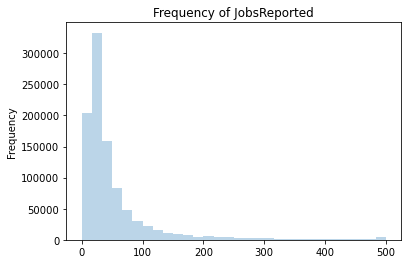

In [60]:
df_new['JobsReported'].plot(
    kind="hist", 
    title="Frequency of JobsReported",
    bins=30,
    alpha=0.3 #adjusts the transperancy
)

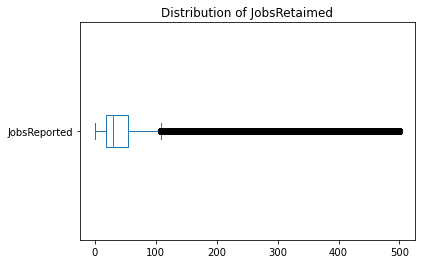

In [61]:
df_new["JobsReported"].plot(
    kind="box",
    vert=False, #makes the box plot horizontal
    title="Distribution of JobsRetaimed"
);

Box plots show us more accurately the distribution of continuous data. The box on the chart represents the interquartile range from the 25th percentile to the 75th percentile and the red line represents the median. The lines leaving the box are called whiskers and the distance from one the end of one whisker to the end of the other represents 99.3% of the data. The other 0.7% is displayed outside the whiskers

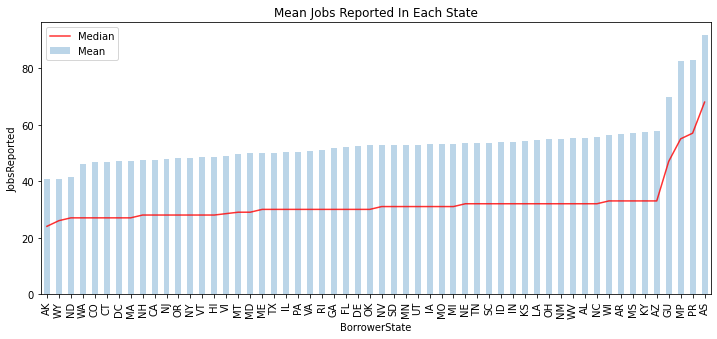

In [62]:
import matplotlib.pyplot as plt
df_new.groupby("BorrowerState")["JobsReported"].mean().sort_values().plot(
    kind="bar",
    title = "Mean Jobs Reported In Each State",
    alpha = 0.3,
    legend=True,
)
df_new.groupby("BorrowerState")["JobsReported"].median().sort_values().plot(
    kind="line",
    title = "Mean Jobs Reported In Each State",
    legend=True,
    color="red",
    rot=90,
    alpha=.8,
    figsize=(12,5) #determines the size 
)
plt.ylabel("JobsReported") 
plt.legend(["Median", "Mean"])

In [63]:
print(df_new['BusinessAgeDescription'].unique())

['Existing or more than 2 years old' 'New Business or 2 years or less'
 'Unanswered' 'Change of Ownership'
 'Startup, Loan Funds will Open Business' nan]


In [38]:
naics_first_two = df_new['NAICSCode'].apply(lambda x: str(x)[:2])
naics_first_two=naics_first_two[naics_first_two != 'na']
vc = naics_first_two.value_counts()
print(len(naics_first_two))

961903


In [36]:
import matplotlib.colors as mcolors # add alias
industry_colors = {'23': 'red', '72': 'green', '62': 'blue', '54': 'yellow', '33': 'purple', '81': 'pink', '42': 'orange', '44': 'brown', '56': 'grey', '48': 'cyan', '32': 'magenta', '53': 'gold', '61': 'olive', '71': 'lime', '51': 'teal', '52': 'navy', '45': 'maroon', '11': 'palegreen', '31': 'coral', '21': 'violet', '99': 'khaki', '49': 'tan', '92': 'salmon', '22': 'lavender', '55': 'beige'}
industry_colors_rgb = {k: mcolors.to_rgb(v) for k, v in industry_colors.items()}

In [57]:
data = df_new.dropna(subset=['JobsReported', 'PAYROLL_PROCEED'])
data = data.reset_index(drop=True)
jobs_reported_shape = data['JobsReported'].shape
payroll_proceed_shape = data['PAYROLL_PROCEED'].shape
print("JobsReported shape:", jobs_reported_shape)
print("PAYROLL_PROCEED shape:", payroll_proceed_shape)

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame containing the relevant columns
# If not, replace 'data' with the appropriate variable name
data = data[['NAICSCode', 'JobsReported', 'PAYROLL_PROCEED','BorrowerZip','BorrowerState']].dropna()

# Perform feature scaling on 'PAYROLL_PROCEED' and 'JobsReported'
scaler = MinMaxScaler()
data[['PAYROLL_PROCEED', 'JobsReported']] = scaler.fit_transform(data[['PAYROLL_PROCEED', 'JobsReported']])

# Verify the maximum values after feature scaling
print("Max value of PAYROLL_PROCEED:", data['PAYROLL_PROCEED'].max())
print("Max value of JobsReported:", data['JobsReported'].max())


JobsReported shape: (966698,)
PAYROLL_PROCEED shape: (966698,)
Max value of PAYROLL_PROCEED: 1.0
Max value of JobsReported: 1.0


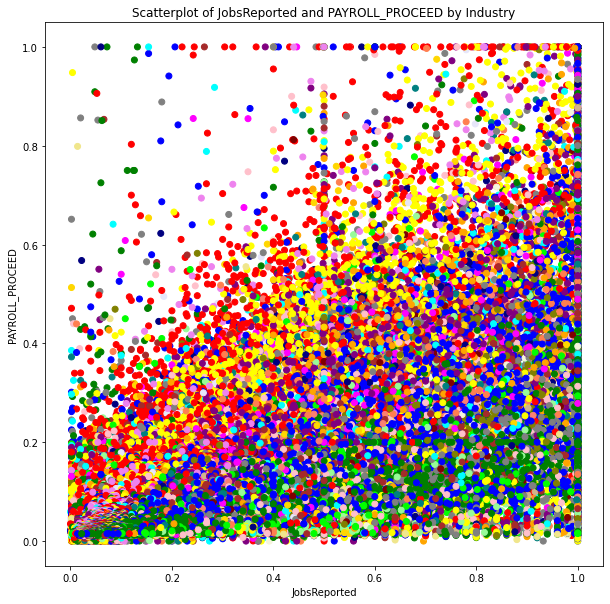

In [28]:
c = naics_first_two.map(industry_colors_rgb)
c = c.dropna()
# align x and y arguments based on index
x, y = data['JobsReported'].align(data['PAYROLL_PROCEED'])
# drop rows that are not in c index
x = x.loc[c.index]
y = y.loc[c.index]
plt.figure(figsize=(10, 10))
plt.scatter(x, y, c=c)
plt.xlabel('JobsReported')
plt.ylabel('PAYROLL_PROCEED')
plt.title('Scatterplot of JobsReported and PAYROLL_PROCEED by Industry')
plt.show()

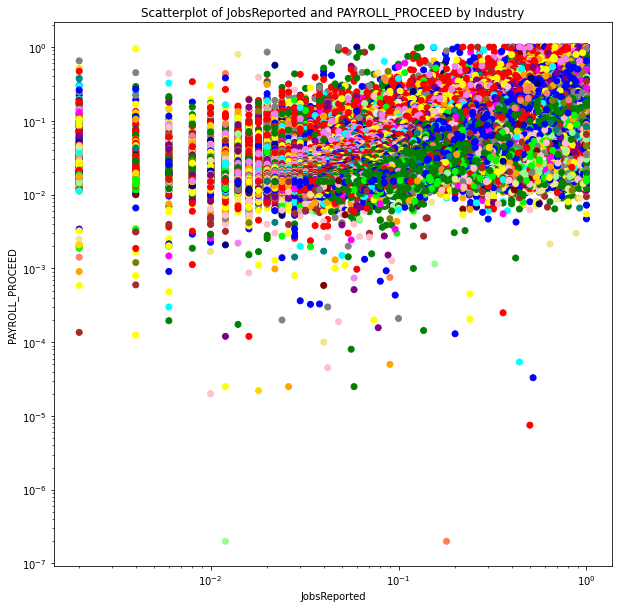

In [18]:
plt.figure(figsize=(10, 10))
plt.scatter(x, y, c=c)
plt.xlabel('JobsReported')
plt.ylabel('PAYROLL_PROCEED')
plt.title('Scatterplot of JobsReported and PAYROLL_PROCEED by Industry')
plt.xscale('log') # use logarithmic scale for x axis
plt.yscale('log') # use logarithmic scale for y axis
plt.show()

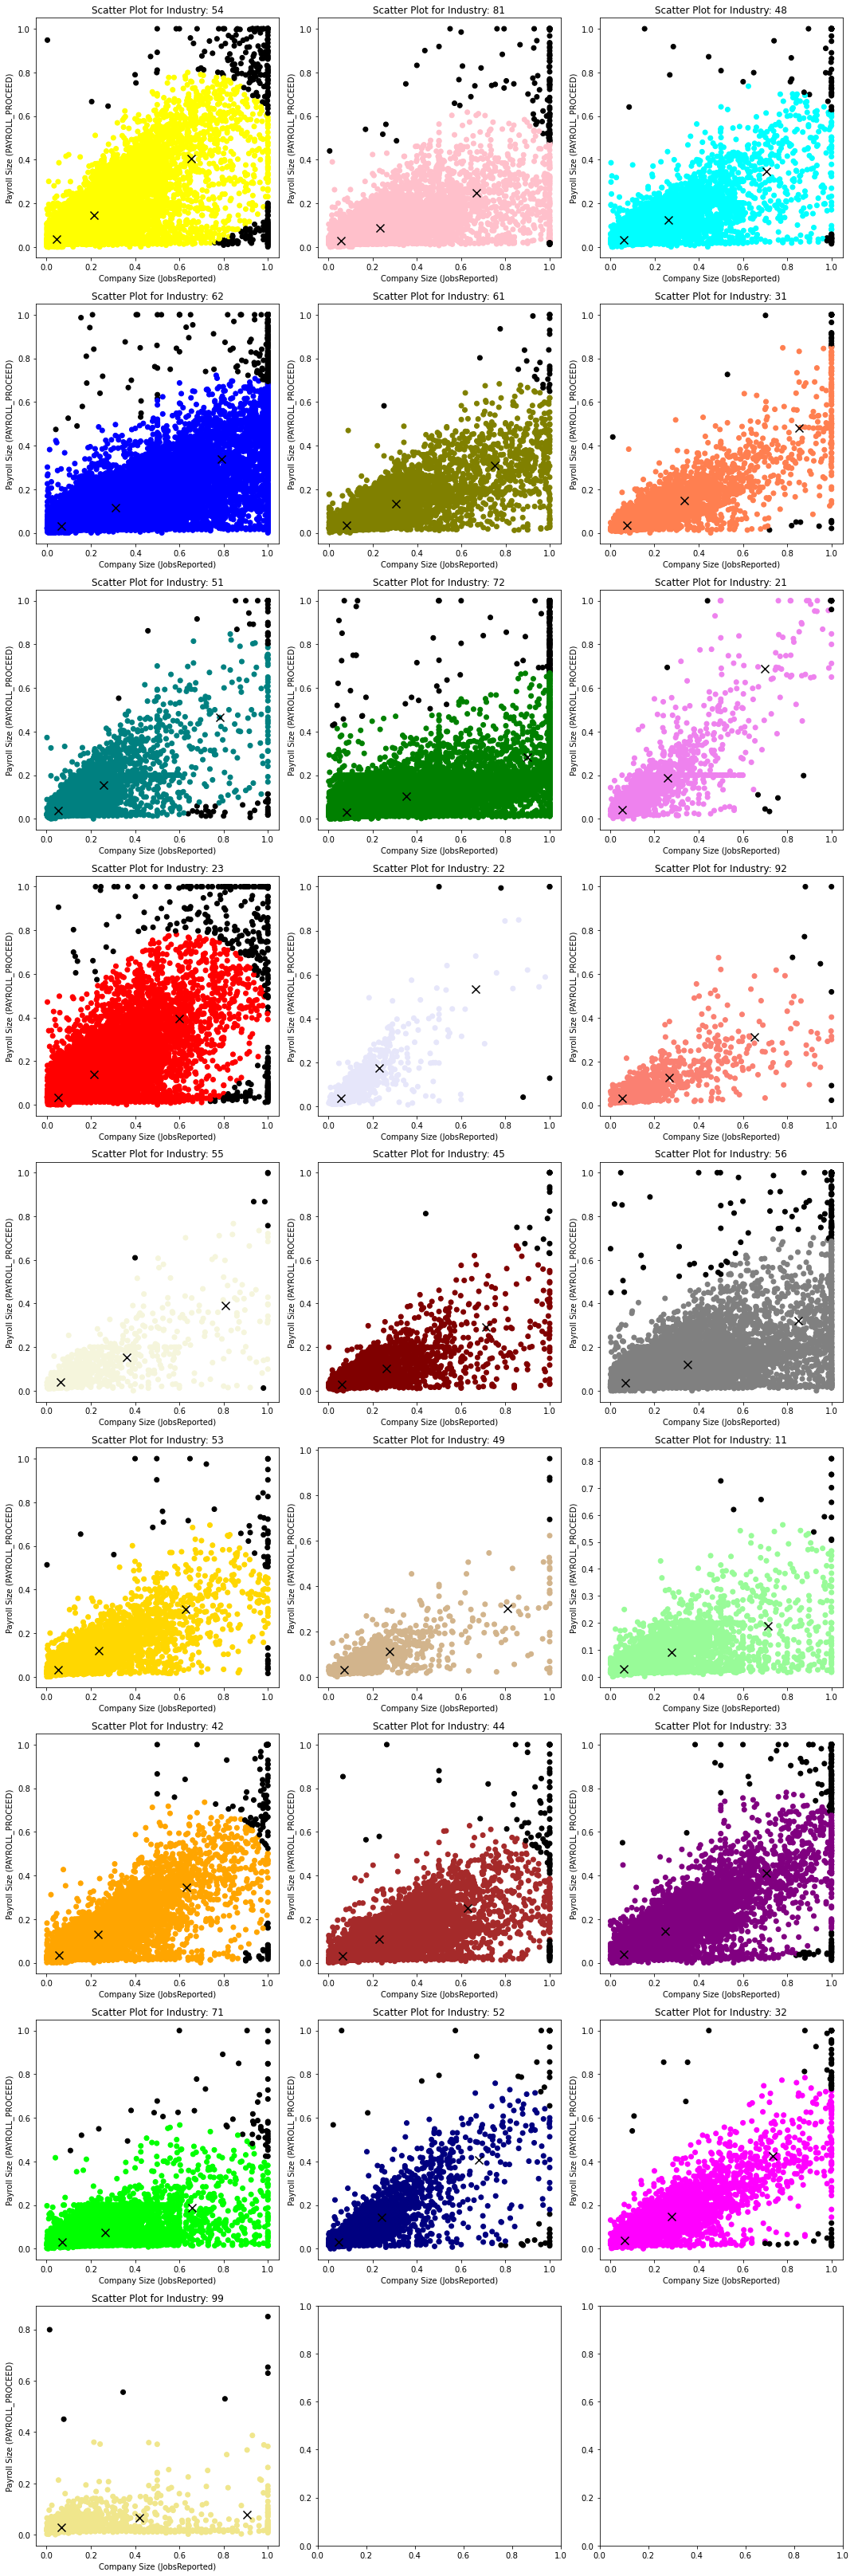

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
import matplotlib.colors as mcolors

# Assuming 'df_new' is your DataFrame containing the data
# If not, replace 'df_new' with the appropriate variable name


outlier_indices = []

# Get unique industries
unique_industries = data['NAICSCode'].apply(lambda x: str(x)[:2]).unique()

# Select the first five unique industries
batch_industries = unique_industries

# Create subplots for each industry
num_rows = int(np.ceil(len(batch_industries) / 3))  # Adjust the number of rows as needed
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

# Iterate over unique industries and plot scatter plot for each
for i, industry in enumerate(batch_industries):
    row = i // 3
    col = i % 3
    ax = axes[row, col] if num_rows > 1 else axes[col]  # Adjust indexing based on number of rows

    # Filter data for the current industry
    mask = data['NAICSCode'].apply(lambda x: str(x)[:2]) == industry
    X = data.loc[mask, ['JobsReported', 'PAYROLL_PROCEED']].values

    # Perform clustering
    kmeans = KMeans(n_clusters=3, n_init=10)  # Use n_jobs to parallelize the computation
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    # Identify outliers
    distances = distance.cdist(X, centroids, 'euclidean')
    threshold = 0.4  # Define your threshold for considering a point as an outlier
    outliers = np.where(np.min(distances, axis=1) > threshold)[0]
    outlier_indices.append(outliers)

    # Plot data points with colors corresponding to industry and clusters
    colors = [industry_colors_rgb[industry] if j not in outliers else 'black' for j in range(len(X))] 
    colors = np.array(colors, dtype=object)
    ax.scatter(X[:, 0], X[:, 1], c=colors, label='Data Points') # Plot all data points at once
    
    # Plot cluster centroids
    ax.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Cluster Centroids')
    #ax.legend()
    ax.set_xlabel('Company Size (JobsReported)')
    ax.set_ylabel('Payroll Size (PAYROLL_PROCEED)')
    ax.set_title('Scatter Plot for Industry: ' + industry)
plt.tight_layout()
plt.show()

In [65]:
outlier_state = []

# Iterate over unique industries
for i, industry in enumerate(batch_industries):
    outliers = outlier_indices[i]
    
    # Filter DataFrame for the current industry outliers in df_new
    industry_mask = data['NAICSCode'].apply(lambda x: str(x)[:2]) == industry
    industry_outliers = data[industry_mask].reset_index(drop=True).iloc[outliers]
    
    # Retrieve zip codes for outlier indices
    zip_codes = industry_outliers['BorrowerState'].tolist()
    outlier_state.extend(zip_codes)


In [66]:
import pandas as pd

# Convert the outlier_zipcodes list to a pandas Series
zip_code_series = pd.Series(outlier_state)

# Calculate the count of each unique zip code
zip_code_counts = zip_code_series.value_counts()

# Print the zip codes and their counts
for index, count in zip_code_counts.items():
    print("State Code:", index, "Count:", count)


State Code: CA Count: 394
State Code: NY Count: 318
State Code: TX Count: 208
State Code: IL Count: 133
State Code: FL Count: 115
State Code: OH Count: 105
State Code: PA Count: 88
State Code: MI Count: 85
State Code: NJ Count: 76
State Code: MA Count: 76
State Code: MN Count: 64
State Code: AZ Count: 63
State Code: WA Count: 60
State Code: GA Count: 58
State Code: VA Count: 52
State Code: CO Count: 51
State Code: TN Count: 49
State Code: NC Count: 46
State Code: MO Count: 45
State Code: IN Count: 40
State Code: WI Count: 37
State Code: OR Count: 33
State Code: LA Count: 28
State Code: UT Count: 28
State Code: MD Count: 27
State Code: KY Count: 24
State Code: CT Count: 23
State Code: AL Count: 22
State Code: KS Count: 20
State Code: NV Count: 20
State Code: SC Count: 19
State Code: NE Count: 16
State Code: OK Count: 15
State Code: IA Count: 14
State Code: PR Count: 12
State Code: ME Count: 12
State Code: NM Count: 9
State Code: HI Count: 8
State Code: NH Count: 7
State Code: ND Count: 

In [55]:
import folium
from geopy.geocoders import Nominatim

# Create a geocoder instance
geolocator = Nominatim(user_agent='application')

# Create a map centered on a specific location (e.g., the United States)
map_center = [37.0902, -95.7129]  # Latitude, Longitude
map_zoom = 5  # Adjust the zoom level as needed
map_outliers = folium.Map(location=map_center, zoom_start=map_zoom)

batch_size = 100  # Number of zip codes to process in each batch

# Iterate over batches of outlier zip codes
for i in range(0, len(outlier_zipcodes), batch_size):
    batch_zip_codes = outlier_zipcodes[i:i+batch_size]
    
    # Process each zip code in the batch
    for zip_code in batch_zip_codes:
        # Geocode the zip code to retrieve latitude and longitude
        location = geolocator.geocode(zip_code)
        if location:
            # Add a marker for each zip code on the map
            folium.Marker([location.latitude, location.longitude], popup=zip_code).add_to(map_outliers)

# Display the map
map_outliers

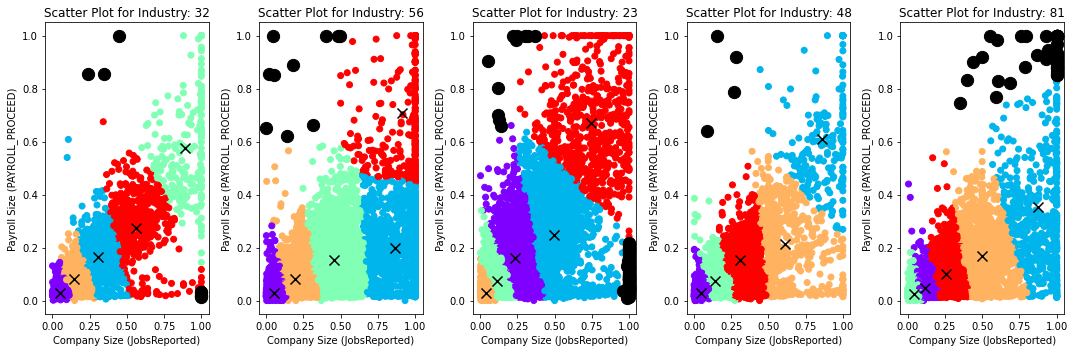

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance

# Assuming 'df_new' is your DataFrame containing the data
# If not, replace 'df_new' with the appropriate variable name

# Preprocess the data
data = df_new[['NAICSCode', 'JobsReported', 'PAYROLL_PROCEED']].dropna()
scaler = MinMaxScaler()
data[['PAYROLL_PROCEED', 'JobsReported']] = scaler.fit_transform(data[['PAYROLL_PROCEED', 'JobsReported']])

# Get a batch of five unique industries
unique_industries = data['NAICSCode'].apply(lambda x: str(x)[:2]).unique()
batch_industries = unique_industries[:5]  # Select the first five unique industries

# Create subplots for each industry in the batch
num_rows = 1
fig, axes = plt.subplots(num_rows, 5, figsize=(15, num_rows * 5))

# Iterate over industries in the batch and plot scatter plot for each
for i, industry in enumerate(batch_industries):
    ax = axes[i]  # Adjust indexing based on the number of industries in the batch

    # Filter data for the current industry
    mask = data['NAICSCode'].apply(lambda x: str(x)[:2]) == industry
    X = data.loc[mask, ['JobsReported', 'PAYROLL_PROCEED']].values

    # Perform clustering
    kmeans = KMeans(n_clusters=5)  # Choose the desired number of clusters
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    # Identify outliers
    distances = distance.cdist(X, centroids, 'euclidean')
    threshold = 0.5  # Define your threshold for considering a point as an outlier
    outliers = np.where(np.min(distances, axis=1) > threshold)[0]

    # Plot data points
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', label='Data Points')

    # Plot cluster centroids
    ax.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Cluster Centroids')

    # Highlight outliers
    ax.scatter(X[outliers, 0], X[outliers, 1], c='black', marker='o', s=150, label='Potential Outliers')

    ax.set_xlabel('Company Size (JobsReported)')
    ax.set_ylabel('Payroll Size (PAYROLL_PROCEED)')
    ax.set_title('Scatter Plot for Industry: ' + industry)
    #ax.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


C:\Users\Junai\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


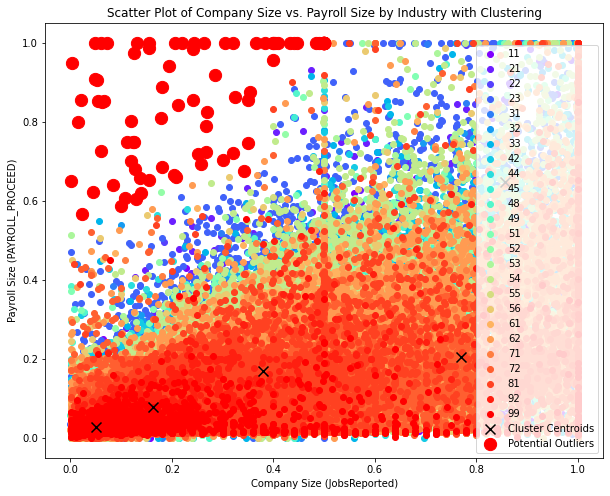

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance

# Assuming 'df_new' is your DataFrame containing the data
# If not, replace 'df_new' with the appropriate variable name

# Preprocess the data
data = df_new[['NAICSCode', 'JobsReported', 'PAYROLL_PROCEED']].dropna()
scaler = MinMaxScaler()
data[['PAYROLL_PROCEED', 'JobsReported']] = scaler.fit_transform(data[['PAYROLL_PROCEED', 'JobsReported']])
X = data[['JobsReported', 'PAYROLL_PROCEED']].values
industry_labels = data['NAICSCode'].apply(lambda x: str(x)[:2]).values

# Perform clustering
kmeans = KMeans(n_clusters=5)  # Choose the desired number of clusters
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Identify outliers
distances = distance.cdist(X, centroids, 'euclidean')
threshold = 0.5  # Define your threshold for considering a point as an outlier
outliers = np.where(np.min(distances, axis=1) > threshold)[0]

# Visualize the results
plt.figure(figsize=(10, 8))

# Plot data points with colors corresponding to industry
unique_industries = np.unique(industry_labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_industries)))

for i, industry in enumerate(unique_industries):
    mask = industry_labels == industry
    plt.scatter(X[mask, 0], X[mask, 1], c=[colors[i]], label=industry)

# Plot cluster centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Cluster Centroids')

# Highlight outliers
plt.scatter(X[outliers, 0], X[outliers, 1], c='red', marker='o', s=150, label='Potential Outliers')

plt.xlabel('Company Size (JobsReported)')
plt.ylabel('Payroll Size (PAYROLL_PROCEED)')
plt.title('Scatter Plot of Company Size vs. Payroll Size by Industry with Clustering')
plt.legend()
plt.show()


In [ ]:
df_test = df[df['Longitude'].isnull()]
null_count = df['Longitude'].isnull().sum()
print(null_count)

In [ ]:
m = folium.Map(location=[37,-95], zoom_start=4)
marker_cluster = MarkerCluster().add_to(m)

for index, row in df.iterrows():
    lat = row['Latitude']
    lon = row['Longitude']
    business_name = row['BusinessName']
    if pd.notnull(lat) and pd.notnull(lon):
        folium.Marker(location=[lat, lon], popup=business_name).add_to(marker_cluster)
m

In [ ]:
m = folium.Map(location=[37,-95], zoom_start=4)
marker_cluster = MarkerCluster().add_to(m)

for i in df['BusinessName']:
    for lat, lon in zip(df['Latitude'], df['Longitude']):
        if pd.notnull(lat) and pd.notnull(lon):
            folium.Marker(location=[lat, lon], popup=i).add_to(marker_cluster)
            
m


In [5]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import folium
from folium.plugins import MarkerCluster

# Define a geolocator using Nominatim






In [ ]:
m = folium.Map(location=[40.7128, -74.0060], zoom_start=12)
# Define a geolocator using Nominatim
geolocator = Nominatim(user_agent="my_app")
marker_cluster = MarkerCluster().add_to(m)
# Use the geolocator to get latitude and longitude for each address
#z =geolocator.geocode(df['BorrowerAddress'].loc[0:3]) 
for i in df['BorrowerAddress'].loc[0:100]:
    z =geolocator.geocode(i)
    lat_lon = (z.latitude, z.longitude)
    folium.Marker(location=lat_lon, popup=i).add_to(marker_cluster)

m

In [ ]:
pip install --default-timeout=100 future

In [ ]:
# Define a geolocator using Nominatim
geolocator = Nominatim(user_agent="my_app")

# Create a map object centered on the US
m = folium.Map(location=[37,-95], zoom_start=4)

# Create a MarkerCluster layer
marker_cluster = MarkerCluster().add_to(m)

# Use the geolocator to get latitude and longitude for each address
for i in df['BorrowerAddress'].loc[0:100]:
    try:
            if pd.notnull(i) :
                geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1,max_retries=3)
                z = geolocator.geocode(i,exactly_one=True, timeout=60)
                folium.Marker(location=[z.latitude, z.longitude], popup=i).add_to(marker_cluster)
    except AttributeError :
        pass

# Show the map with only clusters/bubbles
m


In [ ]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import folium
from folium.plugins import MarkerCluster
import pandas as pd
import time

# Define a geolocator using Nominatim
geolocator = Nominatim(user_agent="my_app")

# Create a map object centered on the US
m = folium.Map(location=[37,-95], zoom_start=4)

# Create a MarkerCluster layer
marker_cluster = MarkerCluster().add_to(m)

# Use batch processing to process addresses in batches of 100
batch_size = 100
num_batches = int(df.shape[0] / batch_size) + 1
for i in range(num_batches):
    start_index = i * batch_size
    end_index = min((i+1) * batch_size, df.shape[0])
    batch_df = df[start_index:end_index]
    print(f"Processed {end_index} out of {df.shape[0]} rows.")
    
    addresses = df['BorrowerAddress'][start_index:end_index].tolist()

    # Use caching to store the latitude and longitude for addresses that have already been geocoded
    cached_locations = {}

    # Use asynchronous processing to speed up the process
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1, max_retries=3, error_wait_seconds=10, return_value_on_exception=None)

    # Geocode addresses and add markers to the map
    for address in addresses:
        if pd.notnull(address) and address not in cached_locations:
            location = geocode(address, exactly_one=True, timeout=60)
            if location is not None:
                cached_locations[address] = (location.latitude, location.longitude)
                folium.Marker(location=[location.latitude, location.longitude], popup=address).add_to(marker_cluster)

    # Sleep for a short while to avoid hitting geocoding API rate limits
    time.sleep(1)

# Show the map with only clusters/bubbles
m


In [ ]:
m

In [ ]:
import time
import pandas as pd

# Define a geolocator using Nominatim
geolocator = Nominatim(user_agent="my_app")

# Create a map object centered on the US
m = folium.Map(location=[37,-95], zoom_start=4)

# Create a MarkerCluster layer
marker_cluster = MarkerCluster().add_to(m)

# Use the geolocator to get latitude and longitude for each address
new_df = pd.DataFrame(columns=['BorrowerAddress', 'Latitude', 'Longitude'])
counter = 0

for i in df['BorrowerAddress']:
    try:
        if pd.notnull(i):
            z = geolocator.geocode(i,timeout=None)
            folium.Marker(location=[z.latitude, z.longitude], popup=i).add_to(marker_cluster)
            new_df = new_df.concat({'BorrowerAddress': i, 'Latitude': z.latitude, 'Longitude': z.longitude}, ignore_index=True)
            counter += 1
            if counter % 5 == 0:
                time.sleep(3)
    except AttributeError:
        pass

    
# Show the map with only clusters/bubbles
m


In [ ]:
new_df

In [ ]:
import matplotlib.pyplot as plt
counts = df['BusinessAgeDescription'].value_counts()
labels = counts.index
sizes = counts.values
total = sum(sizes)

# Calculate percentages and format them as strings with two decimal places
percentages = [f'{(size / total) * 100:.2f}%' for size in sizes]

fig, ax = plt.subplots(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Count and Percentage of Ethnicity')
plt.legend(title='Ethnicity', loc='best', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [ ]:
df = df.sort_values(by=['BorrowerAddress'])
counts = df['BorrowerAddress'].value_counts()
# Create a boolean mask for rows that are duplicates based on "BorrowerAddress"
duplicate_mask = df.duplicated(subset=['BorrowerAddress'], keep=False)

# Filter the DataFrame to only show rows where "BorrowerAddress" is duplicated
duplicates = df[df['BorrowerAddress'].isin(counts[counts > 2].index)]

# Print the duplicate rows
print(duplicates['BorrowerAddress'].value_counts)

In [ ]:
duplicate_percentage = len(duplicates) / len(df) * 100

print(f"Percentage of duplicate loans: {duplicate_percentage:.2f}%")

In [ ]:
duplicate_lenders = duplicates['OriginatingLender'].value_counts().sort_values(ascending=False)
print(duplicate_lenders)